In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Read in training data
current_directory = os.getcwd()

# data to read in: SN, BN
data = []

# participants
participants = ('SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007', 'SN008', 'SN009', 'SN010')

SN=0
for p in participants:
    SN = SN+1
    root_subject = os.path.join('data', p)
    control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]
    BN = 0
    for b in control_folders:
        fb = []
        # uncommnent if you read in everything
        BN = BN+1
        if os.path.isfile(os.path.join(b, 'trials.csv')):
            data_temp = pd.read_csv(os.path.join(b, 'trials.csv'),)
            data_temp.insert(0,'BN', BN)
            data_temp.insert(0,'SN',SN)
            # data_row = [SN, BN, data_temp]
            # data.append(data_row)
            data.append(data_temp)            # pd.concat([data, data_row])
            # print(control_folders)

merged_df = pd.concat(data, ignore_index=True)                        
merged_df

,SN,BN,noise,block,trial,emg,score,soa,gender
0,1,1,0.1,0,0,1,0.609251,4,0
1,1,1,0.0,0,1,1,0.621880,5,0
2,1,1,0.1,0,2,1,0.662875,5,0
3,1,1,0.0,0,3,1,0.650879,5,0
4,1,1,0.2,0,4,1,0.574849,4,0
...,...,...,...,...,...,...,...,...,...
795,10,4,0.2,0,15,1,0.542359,3,0
796,10,4,0.2,0,16,1,0.295233,2,0
797,10,4,0.0,0,17,1,0.543328,4,0
798,10,4,0.0,0,18,1,0.515342,3,0


(0.0, 10.0)

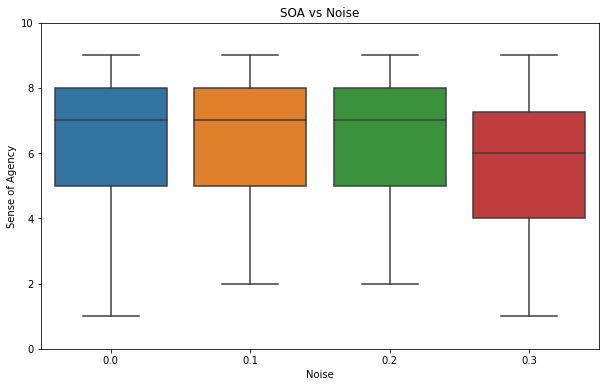

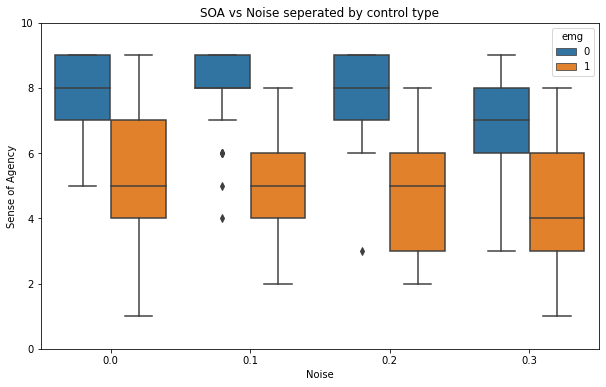

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="noise", y="soa")
plt.title(f'SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="noise", y="soa", hue="emg")
plt.title(f'SOA vs Noise seperated by control type')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))

(0.0, 10.0)

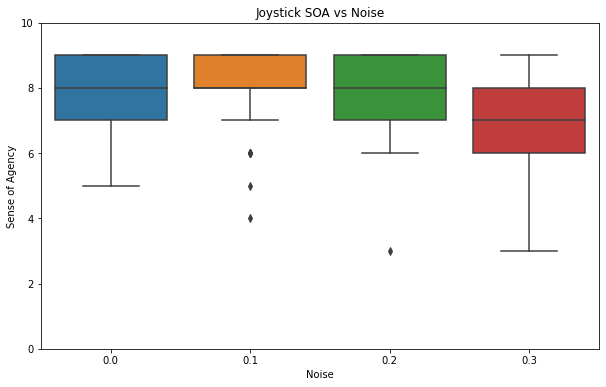

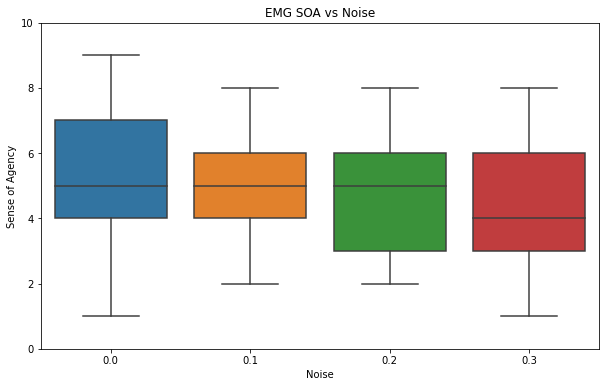

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa")
plt.title(f'Joystick SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa")
plt.title(f'EMG SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))

(0.0, 10.0)

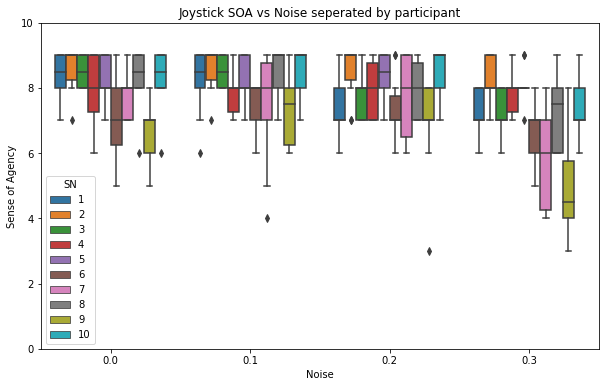

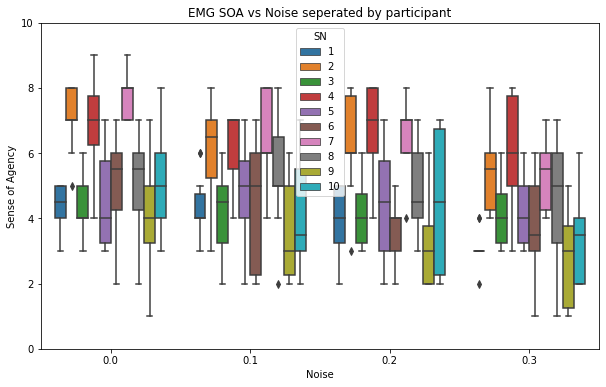

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa", hue="SN")
plt.title(f'Joystick SOA vs Noise seperated by participant')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))


plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa", hue="SN")
plt.title(f'EMG SOA vs Noise seperated by participant')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))

(0.0, 10.0)

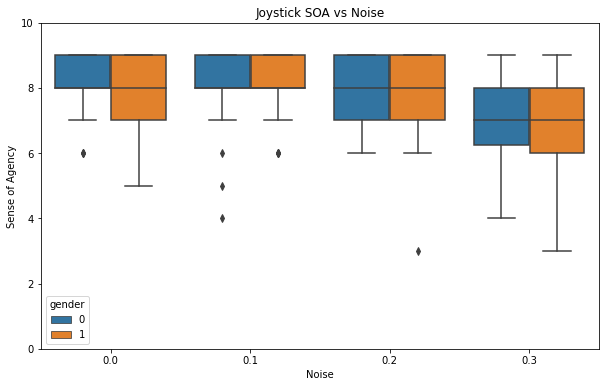

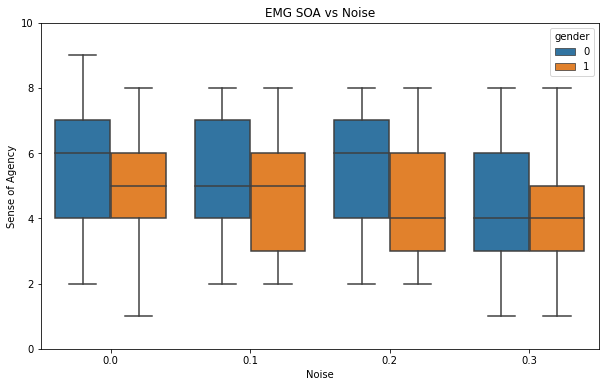

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa", hue="gender")
plt.title(f'Joystick SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa", hue="gender")
plt.title(f'EMG SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))

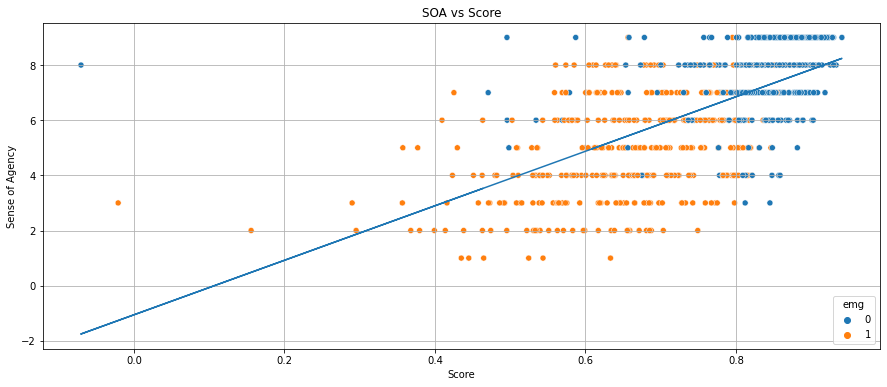

In [22]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=merged_df, x="score", y="soa", hue="emg")
plt.title(f'SOA vs Score')
plt.xlabel('Score')
plt.ylabel('Sense of Agency')
a, b = np.polyfit(merged_df["score"], merged_df["soa"], 1)
plt.plot(merged_df["score"], a*(merged_df["score"])+b)   
plt.grid(True)

Text(0.5, 0, 'SOA')

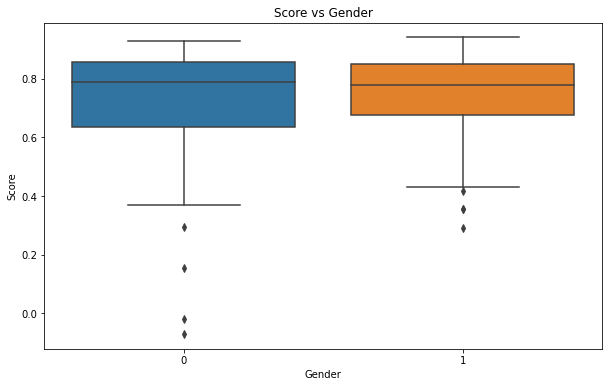

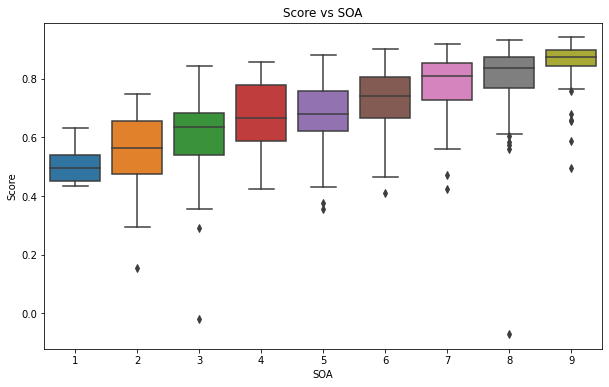

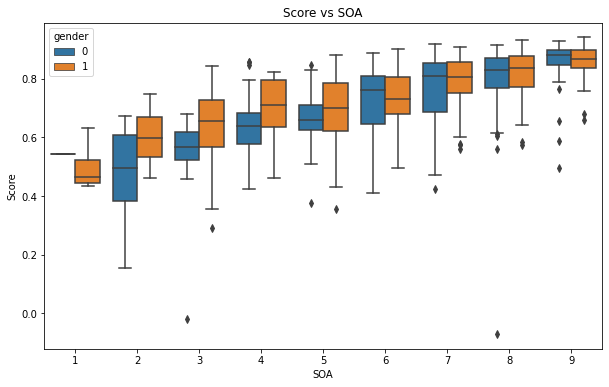

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="gender", y="score")
plt.title(f'Score vs Gender')
plt.ylabel('Score')
plt.xlabel('Gender')

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="soa", y="score")
plt.title(f'Score vs SOA')
plt.ylabel('Score')
plt.xlabel('SOA')

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="soa", y="score", hue="gender")
plt.title(f'Score vs SOA')
plt.ylabel('Score')
plt.xlabel('SOA')
